<a href="https://colab.research.google.com/github/Yuvalakshmii/Learning-preferences-effect-on-CGPA-in-VIT-/blob/main/LEARNING_PREFERENCES_AFFECT_CGPA__IN_VIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file manually in Colab
#uploaded = files.upload()

# Load dataset
df = pd.read_csv("/content/Cleaned_Learning_Preference_Survey.csv")

# Display first few rows
df.head()


,department,year_of_study,preferred_learning_mode\t,learning_tools_used,engagement_level,focus_level,cgpa_change,perceived_impact,learning_advantage,learning_challenge,future_learning_tool
0,AI,Third Year,Online,YouTube,4,Moderately engaged,No change,83,Better understanding of concepts,"Lack of motivation, Internet/connectivity issues",AI-powered tutoring tools
1,AI,Third Year,Online,"YouTube,Online Courses -Coursera/Udemy",4,Occasionally distracted,Slight increase (0.1 - 0.4),84,"Better understanding of concepts, More conven...",Lack of motivation,AI-powered tutoring tools
2,SOFTWARE ENGINEERING,Third Year,Online,"YouTube,Online Courses -Coursera/Udemy",4,Moderately engaged,Slight increase (0.1 - 0.4),79,"Flexibility, Better understanding of concepts","Lack of motivation, Poor interaction with ins...",AI-powered tutoring tools
3,SOFTWARE ENGINEERING,Third Year,Online,"YouTube,Online Courses -Coursera/Udemy",4,Moderately engaged,Slight increase (0.1 - 0.4),89,"Flexibility, Better understanding of concepts",Lack of motivation,AI-powered tutoring tools
4,SOFTWARE ENGINEERING,Third Year,Offline,"Lecture Notes,Textbooks",4,Moderately engaged,Slight increase (0.1 - 0.4),100,Better understanding of concepts,Poor interaction with instructors,YouTube


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


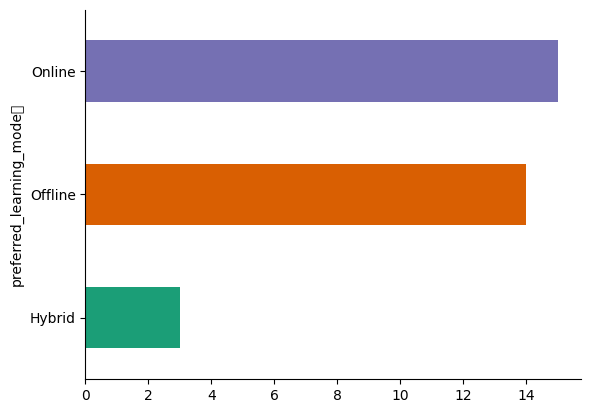

In [ ]:
# @title preferred_learning_mode

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('preferred_learning_mode\t').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

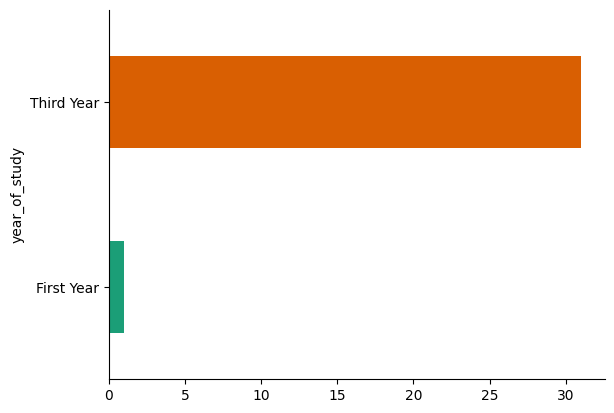

In [ ]:
# @title year_of_study

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('year_of_study').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


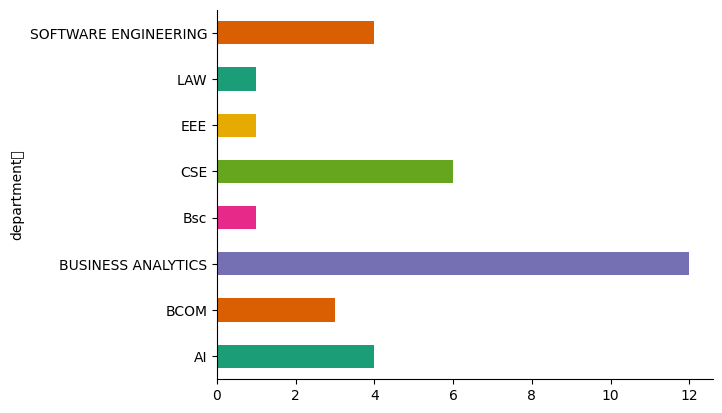

In [ ]:
# @title department

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('department\t').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

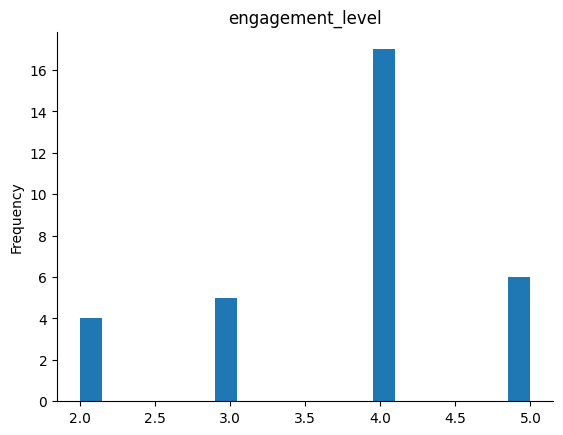

In [ ]:
# @title engagement_level

from matplotlib import pyplot as plt
df['engagement_level'].plot(kind='hist', bins=20, title='engagement_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

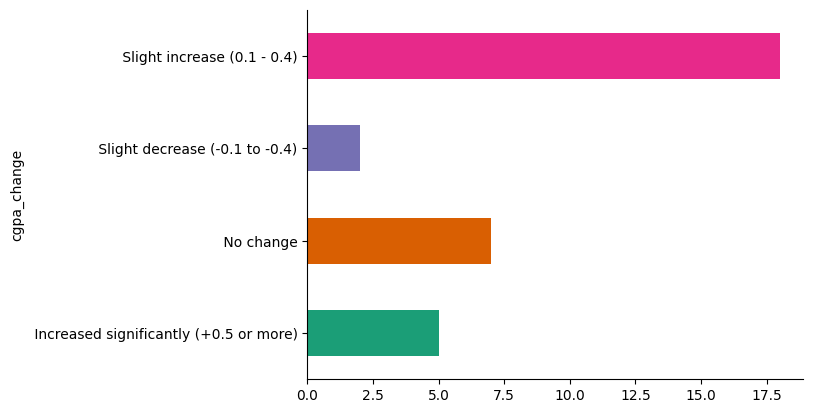

In [ ]:
# @title cgpa_change

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('cgpa_change').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Remove Unnecessary Columns

In [ ]:

df = df.rename(columns=lambda x: x.strip())  # Removes leading/trailing whitespace, including '\t'

# Selecting only relevant columns
columns_to_keep = [
    "department", "preferred_learning_mode",
    "learning_tools_used", "engagement_level", "focus_level",
    "cgpa_change"]

# Keeping only relevant columns
df = df[columns_to_keep]

# Display cleaned dataset
df.head()



,department,preferred_learning_mode,learning_tools_used,engagement_level,focus_level,cgpa_change
0,AI,Online,YouTube,4,Moderately engaged,No change
1,AI,Online,"YouTube,Online Courses -Coursera/Udemy",4,Occasionally distracted,Slight increase (0.1 - 0.4)
2,SOFTWARE ENGINEERING,Online,"YouTube,Online Courses -Coursera/Udemy",4,Moderately engaged,Slight increase (0.1 - 0.4)
3,SOFTWARE ENGINEERING,Online,"YouTube,Online Courses -Coursera/Udemy",4,Moderately engaged,Slight increase (0.1 - 0.4)
4,SOFTWARE ENGINEERING,Offline,"Lecture Notes,Textbooks",4,Moderately engaged,Slight increase (0.1 - 0.4)


#Check for Missing Values & Handle NaNs

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing categorical values with mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify again
print(df.isnull().sum())


department                 0
preferred_learning_mode    0
learning_tools_used        0
engagement_level           0
focus_level                0
cgpa_change                0
dtype: int64
department                 0
preferred_learning_mode    0
learning_tools_used        0
engagement_level           0
focus_level                0
cgpa_change                0
dtype: int64


<ipython-input-4-044b7f2bb731>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


#Encode Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
categorical_cols = ["focus_level", "cgpa_change"]

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Display encoded dataset
df.head()


,department,preferred_learning_mode,learning_tools_used,engagement_level,focus_level,cgpa_change
0,AI,Online,YouTube,4,1,0
1,AI,Online,"YouTube,Online Courses -Coursera/Udemy",4,2,3
2,SOFTWARE ENGINEERING,Online,"YouTube,Online Courses -Coursera/Udemy",4,1,3
3,SOFTWARE ENGINEERING,Online,"YouTube,Online Courses -Coursera/Udemy",4,1,3
4,SOFTWARE ENGINEERING,Offline,"Lecture Notes,Textbooks",4,1,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns using LabelEncoder
categorical_cols = ["cgpa_change"]
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


cgpa_change_mapping = {
    "No change": 0,
    "Slight decrease (-0.1 to -0.4)": -0.5,
    "Slight increase (0.1 - 0.4)": 0.5,
    "Increased significantly (+0.5 or more)": 1.0
}


cgpa_change_reverse_mapping = {
    0: "No change",
    1: "Slight decrease (-0.1 to -0.4)",
    2: "Slight increase (0.1 - 0.4)",
    3: "Increased significantly (+0.5 or more)"
}

# Map encoded values to custom values using the provided reverse mappings
df["cgpa_change"] = df["cgpa_change"].map({label: cgpa_change_mapping.get(cgpa_change_reverse_mapping.get(label)) for label in df["cgpa_change"].unique()})

# Display encoded dataset
df.head()

,department,preferred_learning_mode,learning_tools_used,engagement_level,cgpa_change
0,AI,Online,YouTube,4,-0.5
1,AI,Online,"YouTube,Online Courses -Coursera/Udemy",4,1.0
2,SOFTWARE ENGINEERING,Online,"YouTube,Online Courses -Coursera/Udemy",4,1.0
3,SOFTWARE ENGINEERING,Online,"YouTube,Online Courses -Coursera/Udemy",4,1.0
4,SOFTWARE ENGINEERING,Offline,"Lecture Notes,Textbooks",4,1.0


#MNLR :model predicts how preferred learning mode + department + Learning tools used impact CGPA change.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("/content/Cleaned_Learning_Preference_Survey.csv")


df = df.rename(columns=lambda x: x.strip())  # Removes leading/trailing whitespace, including '\t'

# Selecting only relevant columns
columns_to_keep = [
    "department", "preferred_learning_mode",
    "learning_tools_used", "engagement_level",
    "cgpa_change"]

# Keeping only relevant columns
df = df[columns_to_keep]


# Define independent variables (IVs)
categorical_cols = ["preferred_learning_mode", "department","learning_tools_used"]

# One-Hot Encode categorical IVs
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Define X (IVs) and y (DV)
X = df_encoded.drop(columns=["cgpa_change"])
y = df["cgpa_change"]

# Fit MNLR model
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X, y)

# Predict
y_pred = model.predict(X)
print(y_pred[:10])  # Print first 10 predictions


[' Slight increase (0.1 - 0.4)' ' Slight increase (0.1 - 0.4)'
 ' Slight increase (0.1 - 0.4)' ' Slight increase (0.1 - 0.4)'
 ' Slight increase (0.1 - 0.4)' ' Slight increase (0.1 - 0.4)'
 ' Slight increase (0.1 - 0.4)' ' Slight increase (0.1 - 0.4)'
 ' Slight increase (0.1 - 0.4)' ' Slight increase (0.1 - 0.4)']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#CHI SQUARE

In [ ]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test for each IV against CGPA Change
for col in ["preferred_learning_mode", "department","learning_tools_used"]:
    contingency_table = pd.crosstab(df[col], df["cgpa_change"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {col} vs CGPA Change:")
    print(f"Chi2 = {chi2}, p-value = {p}\n")


Chi-Square Test for preferred_learning_mode vs CGPA Change:
Chi2 = 10.006107331821617, p-value = 0.12439506199736193

Chi-Square Test for department vs CGPA Change:
Chi2 = 29.56190476190476, p-value = 0.1011514448126585

Chi-Square Test for learning_tools_used vs CGPA Change:
Chi2 = 20.011791383219954, p-value = 0.6961053943061429





```
Inference from the Chi-Square Test Results
The Chi-Square test checks whether there is a significant relationship between the independent variables (IVs) and the dependent variable (CGPA Change).

Results Interpretation:-

               Preferred Learning Mode vs CGPA Change

Chi² = 10.006

p-value = 0.1243 (> 0.05)

Inference: There is no statistically significant relationship between the preferred learning mode and CGPA change.

                    Department vs CGPA Change

Chi² = 29.5619

p-value = 0.1011 (> 0.05)

Inference: There is no statistically significant relationship between department and CGPA change.

                 Learning Tools Used vs CGPA Change

Chi² = 20.0118

p-value = 0.6961 (> 0.05)

Inference: There is no statistically significant relationship between learning tools used and CGPA change.

Overall Conclusion
Since all p-values are greater than 0.05, none of the IVs (Preferred Learning Mode, Department, Learning Tools Used) have a significant impact on CGPA Change.

This means that CGPA change does not strongly depend on these factors.```



#Decision Tree & Random Forest for CGPA Change Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical variables
categorical_cols = ["preferred_learning_mode", "department", "learning_tools_used", "cgpa_change"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Define independent (X) and dependent (y) variables
X = df[["preferred_learning_mode", "department", "learning_tools_used"]]  # IVs
y = df["cgpa_change"]  # DV

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Decision Tree Results:
Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           3       0.60      0.75      0.67         4

    accuracy                           0.43         7
   macro avg       0.20      0.25      0.22         7
weighted avg       0.34      0.43      0.38         7


Random Forest Results:
Accuracy: 0.42857142857142855
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           3       0.60      0.75      0.67         4

    accuracy                           0.43         7
   macro avg       0.20      0.25      0.22         7
weighted avg       0.34      0.43      0.38         7



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

#GROUPING

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway


# Function to round to valid CGPA values
def round_to_valid_cgpa(value):
    valid_values = [0, 1, -0.5, 0.5]
    closest_value = min(valid_values, key=lambda x: abs(x - value))
    return closest_value

# Preprocessing: Clean department and other categorical columns
df['department'] = df['department'].str.strip().str.upper()  # Clean department names
df['preferred_learning_mode'] = df['preferred_learning_mode'].str.strip().str.upper()  # Clean learning mode
df['learning_tools_used'] = df['learning_tools_used'].str.strip().str.upper()  # Clean learning tools

# Group by department and preferred learning mode, calculating average CGPA change and rounding
learning_mode_efficiency = df.groupby(["department", "preferred_learning_mode"])["cgpa_change"].apply(lambda x: pd.to_numeric(x, errors='coerce').mean()).reset_index()
learning_mode_efficiency["cgpa_change"] = learning_mode_efficiency["cgpa_change"].apply(round_to_valid_cgpa)

# Further aggregate to have one row per department and learning mode
learning_mode_efficiency = learning_mode_efficiency.groupby(["department", "preferred_learning_mode"])["cgpa_change"].mean().reset_index()
learning_mode_efficiency["cgpa_change"] = learning_mode_efficiency["cgpa_change"].apply(round_to_valid_cgpa) # Round again after aggregation



# Group by department and learning tool, calculating average CGPA change and rounding
learning_tool_efficiency = df.groupby(["department", "learning_tools_used"])["cgpa_change"].apply(lambda x: pd.to_numeric(x, errors='coerce').mean()).reset_index()
learning_tool_efficiency["cgpa_change"] = learning_tool_efficiency["cgpa_change"].apply(round_to_valid_cgpa)

# Further aggregate to have one row per department and learning tool
learning_tool_efficiency = learning_tool_efficiency.groupby(["department", "learning_tools_used"])["cgpa_change"].mean().reset_index()
learning_tool_efficiency["cgpa_change"] = learning_tool_efficiency["cgpa_change"].apply(round_to_valid_cgpa) # Round again after aggregation

# Display department-wise preferred learning mode and CGPA change
print("Department-wise Preferred Learning Mode and CGPA Change:")
for department in learning_mode_efficiency["department"].unique():
    department_data = learning_mode_efficiency[learning_mode_efficiency["department"] == department]
    print(f"\nDepartment: {department}")
    for index, row in department_data.iterrows():
        print(f"  - {row['preferred_learning_mode']}: {row['cgpa_change']}")

# Display department-wise learning tools used and CGPA change
print("\nDepartment-wise Learning Tools Used and CGPA Change:")
for department in learning_tool_efficiency["department"].unique():
    department_data = learning_tool_efficiency[learning_tool_efficiency["department"] == department]
    print(f"\nDepartment: {department}")
    for index, row in department_data.iterrows():
        print(f"  - {row['learning_tools_used']}: {row['cgpa_change']}")


Department-wise Preferred Learning Mode and CGPA Change:

Department: AI
  - OFFLINE: -0.5
  - ONLINE: 0.5

Department: BCOM
  - OFFLINE: 1.0
  - ONLINE: 0.0

Department: BSC
  - HYBRID: 0.5

Department: BUSINESS ANALYTICS
  - HYBRID: 1.0
  - OFFLINE: 0.0
  - ONLINE: 0.5

Department: CSE
  - OFFLINE: 0.5
  - ONLINE: 0.5

Department: EEE
  - OFFLINE: 1.0

Department: LAW
  - HYBRID: 0.0

Department: SOFTWARE ENGINEERING
  - OFFLINE: 1.0
  - ONLINE: 1.0

Department-wise Learning Tools Used and CGPA Change:

Department: AI
  - YOUTUBE: 0.0
  - YOUTUBE,LECTURE NOTES: -0.5
  - YOUTUBE,ONLINE COURSES -COURSERA/UDEMY: 1.0

Department: BCOM
  - TEXTBOOKS: 0.5
  - YOUTUBE: 1.0
  - YOUTUBE,LECTURE NOTES: 0.0

Department: BSC
  - LECTURE NOTES: 0.5

Department: BUSINESS ANALYTICS
  - LECTURE NOTES: 0.5
  - ONLINE COURSES -COURSERA/UDEMY,STUDY GROUPS,LECTURE NOTES: 1.0
  - TEXTBOOKS: 0.0
  - YOUTUBE: 0.0
  - YOUTUBE,LECTURE NOTES: 0.5

Department: CSE
  - LECTURE NOTES: -0.5
  - LECTURE NOTES,ONLI

Boxplot – CGPA Change by Learning Mode & Department

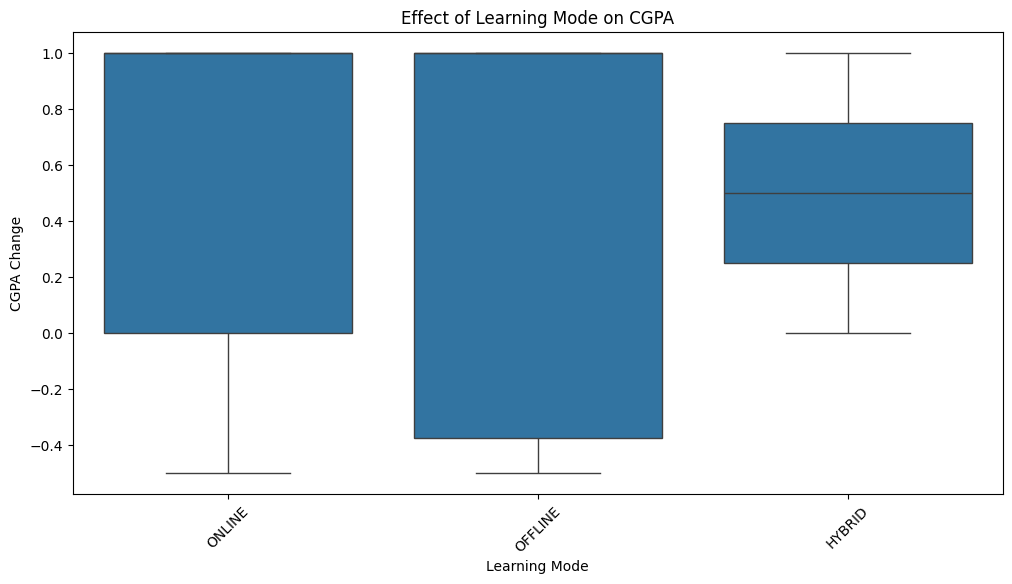

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="preferred_learning_mode", y="cgpa_change", data=df)
plt.xticks(rotation=45)
plt.title("Effect of Learning Mode on CGPA")
plt.xlabel("Learning Mode")
plt.ylabel("CGPA Change")
plt.show()


Bar Chart – Mean CGPA Change for Learning Tools



<ipython-input-39-f9e206bdbd61>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="learning_tools_used", y="cgpa_change", data=df, ci=None)


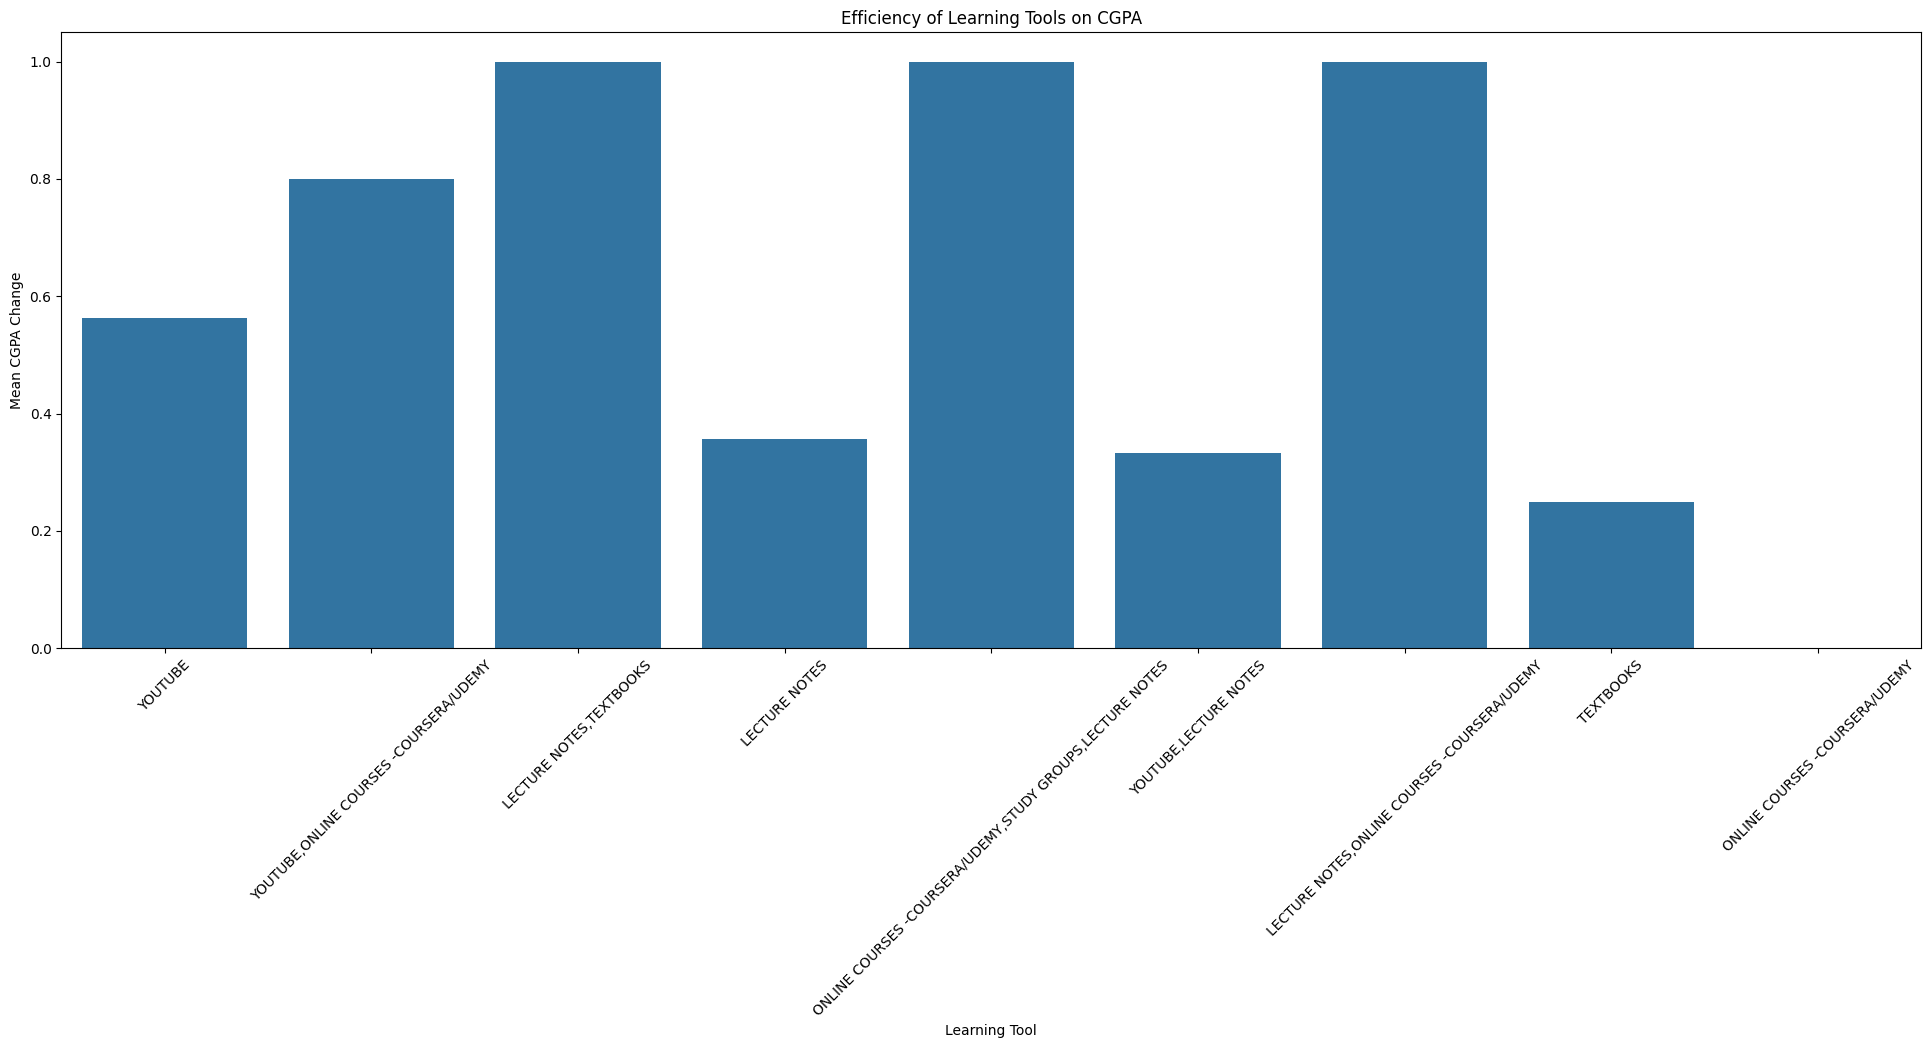

In [ ]:
plt.figure(figsize=(24, 8))
sns.barplot(x="learning_tools_used", y="cgpa_change", data=df, ci=None)
plt.xticks(rotation=45)
plt.title("Efficiency of Learning Tools on CGPA")
plt.xlabel("Learning Tool")
plt.ylabel("Mean CGPA Change")
plt.show()


#ANOVA Test – Statistical Significance

In [ ]:
# Perform ANOVA for learning mode impact
groups_mode = [df[df["preferred_learning_mode"] == mode]["cgpa_change"] for mode in df["preferred_learning_mode"].unique()]
anova_mode = f_oneway(*groups_mode)

# Perform ANOVA for learning tools impact
groups_tool = [df[df["learning_tools_used"] == tool]["cgpa_change"] for tool in df["learning_tools_used"].unique()]
anova_tool = f_oneway(*groups_tool)

print("ANOVA Test for Learning Mode Impact on CGPA:", anova_mode)
print("ANOVA Test for Learning Tools Impact on CGPA:", anova_tool)


ANOVA Test for Learning Mode Impact on CGPA: F_onewayResult(statistic=np.float64(0.09962082844652949), pvalue=np.float64(0.9054889813673088))
ANOVA Test for Learning Tools Impact on CGPA: F_onewayResult(statistic=np.float64(0.5876640069508656), pvalue=np.float64(0.777779412214501))


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode CGPA Change categories
df["cgpa_change"] = encoder.fit_transform(df["cgpa_change"])

# Define custom mapping for numeric values
cgpa_change_mapping = {
    0: 0,    # No change
    1: -0.5, # Slight decrease (-0.1 to -0.4)
    2: 0.5,  # Slight increase (0.1 - 0.4)
    3: 1.0   # Increased significantly (+0.5 or more)
}

# Apply mapping
df["cgpa_change"] = df["cgpa_change"].map(cgpa_change_mapping)

# Check if it worked
print(df["cgpa_change"].unique())


[ 0.   1.  -0.5  0.5]


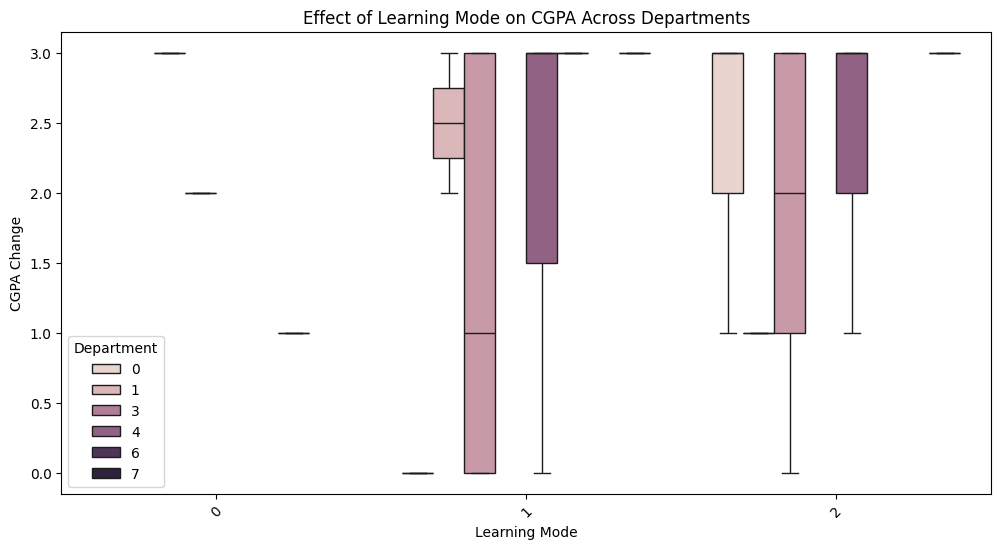

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="preferred_learning_mode", y="cgpa_change", hue="department", data=df)
plt.xticks(rotation=45)
plt.title("Effect of Learning Mode on CGPA Across Departments")
plt.xlabel("Learning Mode")
plt.ylabel("CGPA Change")
plt.legend(title="Department")
plt.show()


<ipython-input-58-e46734ea881b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="learning_tools_used", y="cgpa_change", hue="department", data=df, ci=None)


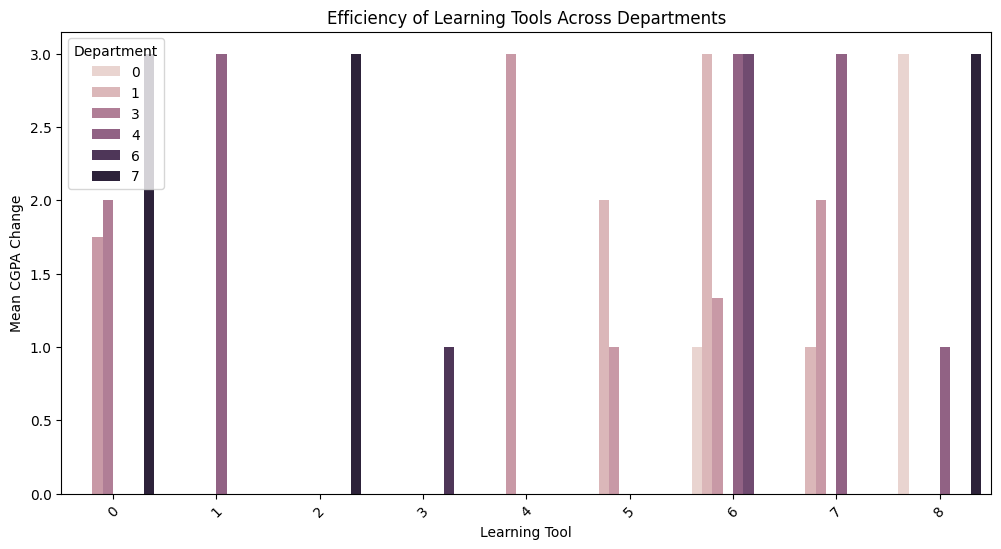

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="learning_tools_used", y="cgpa_change", hue="department", data=df, ci=None)
plt.xticks(rotation=45)
plt.title("Efficiency of Learning Tools Across Departments")
plt.xlabel("Learning Tool")
plt.ylabel("Mean CGPA Change")
plt.legend(title="Department")
plt.show()


#NEW
